In [2]:
import numpy as np
import sympy as sp
from qiskit import QuantumRegister, QuantumCircuit, transpile
from numpy import pi
from qiskit.quantum_info import Operator
from qiskit.visualization import array_to_latex

The Toffoli gate has a known decomposition into H (U(pi/2,0,pi)) and T (U(0,0,pi/4)) gates. From Nelson and Chuang pg 182 (where we have replaced the S gate). The decomposition is as follows:

In [3]:
# building Qiskit circuit for Toffoli decomposition
qreg_q = QuantumRegister(3, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.h(2)
circuit.cx(qreg_q[1], qreg_q[2])
circuit.tdg(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.t(qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.tdg(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.t(qreg_q[1])
circuit.t(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.t(qreg_q[0])
circuit.tdg(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])

unitary = Operator(circuit).data
array_to_latex(unitary, prefix="\\text{Unitary} = ") # Note that Qiskit uses little endian ordering instead of Big endian ordering, so this unitary looks different than the textbook one for the Toffoli gate

<IPython.core.display.Latex object>

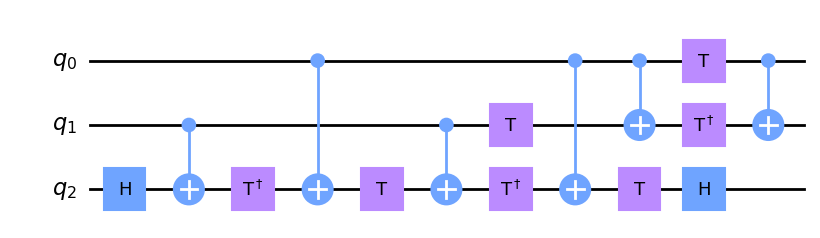

In [4]:
circuit.draw(output='mpl') # Here is the H,T Toffoli decomposition. 
# The basic idea is that we use interleaved inverse gates to cancel each other out unless all of the controls are "1",
#  in which case the T gates constructively add a phase to the target qubit that implements the X gate when we H back into the computational (|0>,|1>) basis.

In [5]:
# To test our decomposition, lets compare it to Qiskit's built-in Toffoli gate.
qreg_q = QuantumRegister(3, 'q')
circuit2 = QuantumCircuit(qreg_q)

circuit2.ccx(qreg_q[0], qreg_q[1], qreg_q[2])

unitary2 = Operator(circuit2).data
array_to_latex(unitary2, prefix="\\text{Unitary} = ")

<IPython.core.display.Latex object>

In [6]:
np.all(np.isclose(unitary,unitary2)) # We can see that the two unitaries are the same, so our decomposition is correct.

True

Now, to generalize to the 4-qubit case, we apply the same logic as above to the CCCX gate. This requires additional CNOT gates to be added to the target qubit to control on the extra qubit. Since the phase we add after each CNOT is constructively added, we must use a Phase gate (U(0,0,theta)) instead of a T gate (U(0,0,pi/4)) where theta = pi/8 to make the row implement a X gate. The decomposition is as follows:

In [12]:
qreg_q = QuantumRegister(4, 'q')

circuit3 = QuantumCircuit(qreg_q)

theta = np.pi/8 # Set angle of Phase Gate

# Operations on target qubit, q[3]
circuit3.h(qreg_q[3])
circuit3.cx(qreg_q[2], qreg_q[3])
circuit3.p(-theta,qreg_q[3])
circuit3.cx(qreg_q[1], qreg_q[3])
circuit3.p(theta,qreg_q[3])
circuit3.cx(qreg_q[0], qreg_q[3])
circuit3.p(-theta, qreg_q[3])
circuit3.cx(qreg_q[1], qreg_q[3])
circuit3.p(theta, qreg_q[3])
circuit3.cx(qreg_q[2], qreg_q[3])
circuit3.p(-theta, qreg_q[3])
circuit3.cx(qreg_q[1], qreg_q[3])
circuit3.p(theta, qreg_q[3])
circuit3.cx(qreg_q[0], qreg_q[3])
circuit3.p(-theta, qreg_q[3])
circuit3.cx(qreg_q[1], qreg_q[3])
circuit3.p(theta, qreg_q[3])
circuit3.h(qreg_q[3])
###
# Operations on control qubit, q[2]
circuit3.p(theta, qreg_q[2])
circuit3.cx(qreg_q[0], qreg_q[2])
circuit3.p(-theta, qreg_q[2])
circuit3.cx(qreg_q[1], qreg_q[2])
circuit3.p(theta, qreg_q[2])
circuit3.cx(qreg_q[0], qreg_q[2])
circuit3.p(-theta, qreg_q[2])
circuit3.cx(qreg_q[1], qreg_q[2])
###
# Operations on control qubit, q[1]
circuit3.p(theta, qreg_q[1])
circuit3.cx(qreg_q[0], qreg_q[1])
circuit3.p(-theta, qreg_q[1])
circuit3.cx(qreg_q[0], qreg_q[1])
###
# Operations on control qubit, q[0]
circuit3.p(theta, qreg_q[0])

# It is worth noting that a Phase gate sends |0> to |0> and |1> to e^(i*theta)|1>, 
# so it doesn't matter if we move a particular phase through a control on a CNOT gate, since it won't change a |0> to a |1> or vice versa.

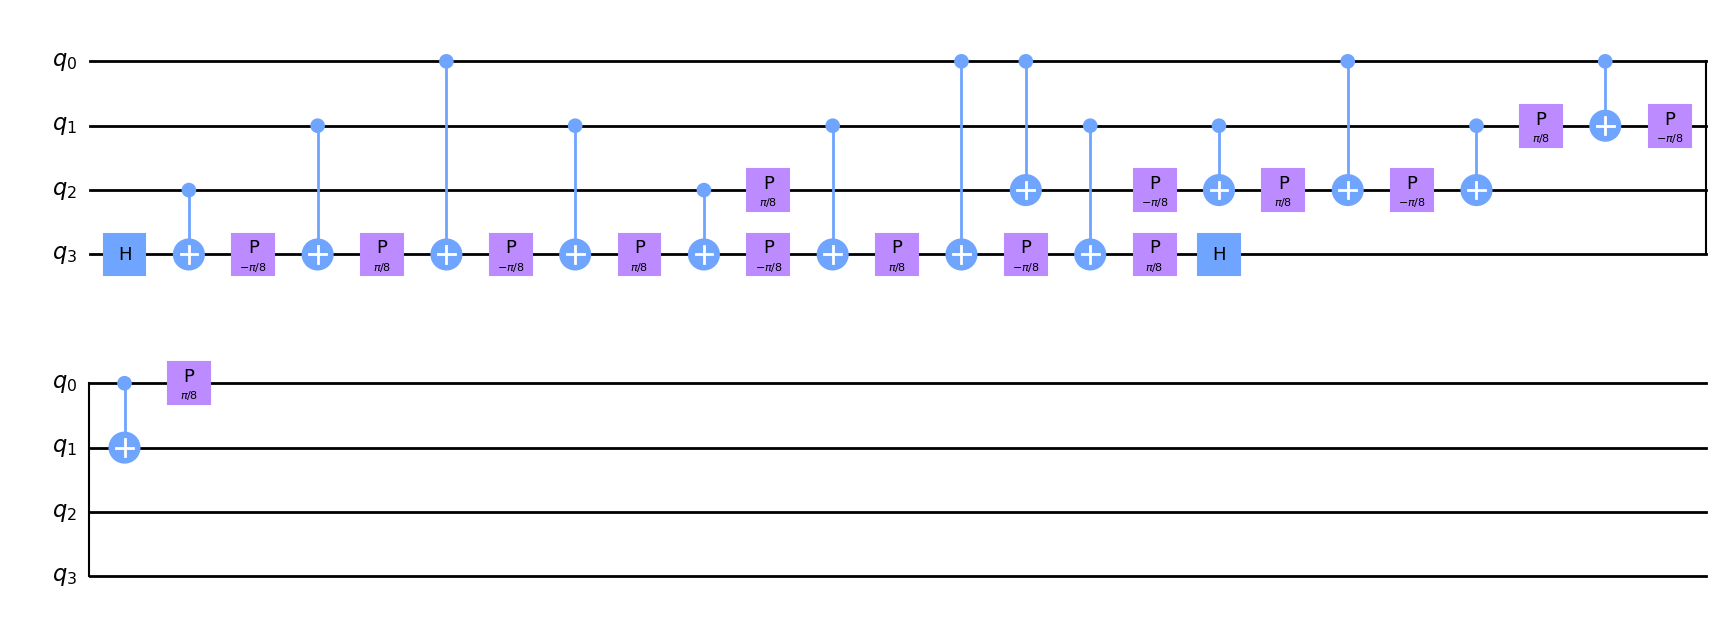

In [13]:
circuit3.draw(output='mpl')

In [14]:
unitary3 = Operator(circuit3).data
array_to_latex(unitary3, prefix="\\text{Unitary} = ", max_size=100)

<IPython.core.display.Latex object>

In [10]:
# Now let's again compare our decomposition to Qiskit's built-in multi-controlled X gate.
qreg_q = QuantumRegister(4, 'q')
circuit4 = QuantumCircuit(qreg_q)

circuit4.mcx([qreg_q[0], qreg_q[1], qreg_q[2]], qreg_q[3])

unitary4 = Operator(circuit4).data
array_to_latex(unitary4, prefix="\\text{Unitary} = ", max_size=100)

<IPython.core.display.Latex object>

In [11]:
np.all(np.isclose(unitary3,unitary4)) # We can see that the two unitaries are the same, so our decomposition is correct.

True